# Curve Fitting and Modelling Data

scipy.optimize.curve_fit

curve_fit is part of scipy.optimize and a wrapper for scipy.optimize.leastsq that overcomes its poor usability. Like leastsq, curve_fit internally uses a Levenburg-Marquardt gradient method (greedy algorithm) to minimise the objective function.

Least square fit (chi square fit)

$ x^{2} = \sum \limits _{n=1} ^{N} \Bigg(\frac{y_{n}-f(x_{n})}{\sigma_{n}}\Bigg)^2 $

-1.0656854837033813 0.3997631218715831 -0.029589005304850955


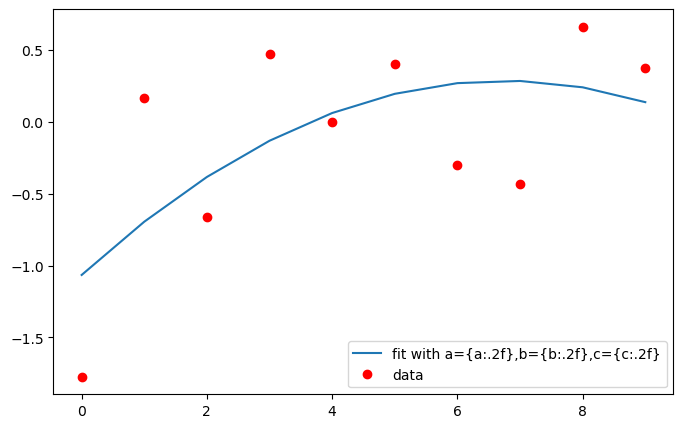

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

xdata = np.arange(0,10,1) #returns evenly spaces given an interval

def func(x,a,b,c): #generates a function
    return a + b*x + c*x*x

ydata = func(xdata, 5,-1,1) 
yerr = np.random.randn(np.size(ydata)) 
ydata =+yerr

x0 = [0,0,0]

a=sci.curve_fit(func,xdata,ydata,x0)[0][0]
b=sci.curve_fit(func,xdata,ydata,x0)[0][1]
c=sci.curve_fit(func,xdata,ydata,x0)[0][2]

print(a,b,c)

plt.figure(figsize=[8,5])
plt.plot(xdata,func(xdata,a,b,c), label ='fit with a={a:.2f},b={b:.2f},c={c:.2f}')
plt.plot(xdata,ydata,'ro',label='data')
plt.legend()
plt.show()

Astropy.modelling features

Adding two gaussians together to create a spectral line

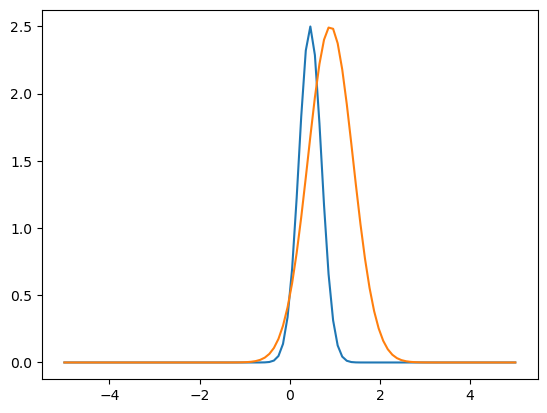

In [3]:
from astropy.modeling import models

g1 = models.Gaussian1D(amplitude=2.5,mean=0.9,stddev=0.5)
g1.name = 'Main Gaussian'
x = np.linspace(-5,5,100)
y1 = g1(2*x)
y2 = g1(x)

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [4]:
from astropy.modeling import fitting

fitter = fitting.LevMarLSQFitter()

Gmodel = models.Gaussian1D()
g1 = models.Gaussian1D(amplitude=2.5,mean=0.9,stddev=0.5)
model = fitter(Gmodel,xdata,g1)

#yarım kaldı

TypeError: float() argument must be a string or a real number, not 'Gaussian1D'

In [ ]:
gauss_model.parameter_constraints 

Fitting an image of a disk galaxy with a model

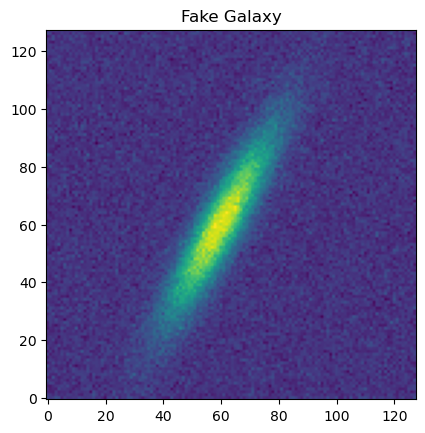

In [5]:
#generate a noisy sky
np.random.seed(0)
sky = np.random.normal(loc=0, scale=2, size=(128,128))

#generate a fuzzy galaxy disk
x,y = np.mgrid[:128, :128]
gal_model = models.Gaussian2D(amplitude=.008,x_mean=60,y_mean=60,x_stddev=25,y_stddev=5,theta=.5)
galaxy = gal_model(x,y)*5000

#combine the background and galaxy to create the image of the fake scene
image = galaxy + sky

plt.title('Fake Galaxy')
plt.imshow(image,origin='lower')


In [16]:
#use the Levenberg-Marquardt optimization algorithm and least squares statistics.
fitter = fitting.LevMarLSQFitter()

#assume the background follows a 2D Const and set the value to the median of the image
sky_model = models.Const2D() 
sky_model.amplitude = np.median(image.flatten()) #find median of the image
sky_model.amplitude.fixed = True 

#assume galaxy follows a 2D Gaussian model, and add initial parameters that act as our starting guess
galaxy_model = models.Gaussian2D(amplitude=0,x_mean=55,y_mean=55,x_stddev=20,y_stddev=8,theta=0)
galaxy_model.theta.min = 0
galaxy_model.theta.max = 2*np.pi

#create the compound model that will represent the model
scene = sky_model + galaxy_model

#use the fitter to fit the image to the scene model
model = fitter(scene,x,y,image)

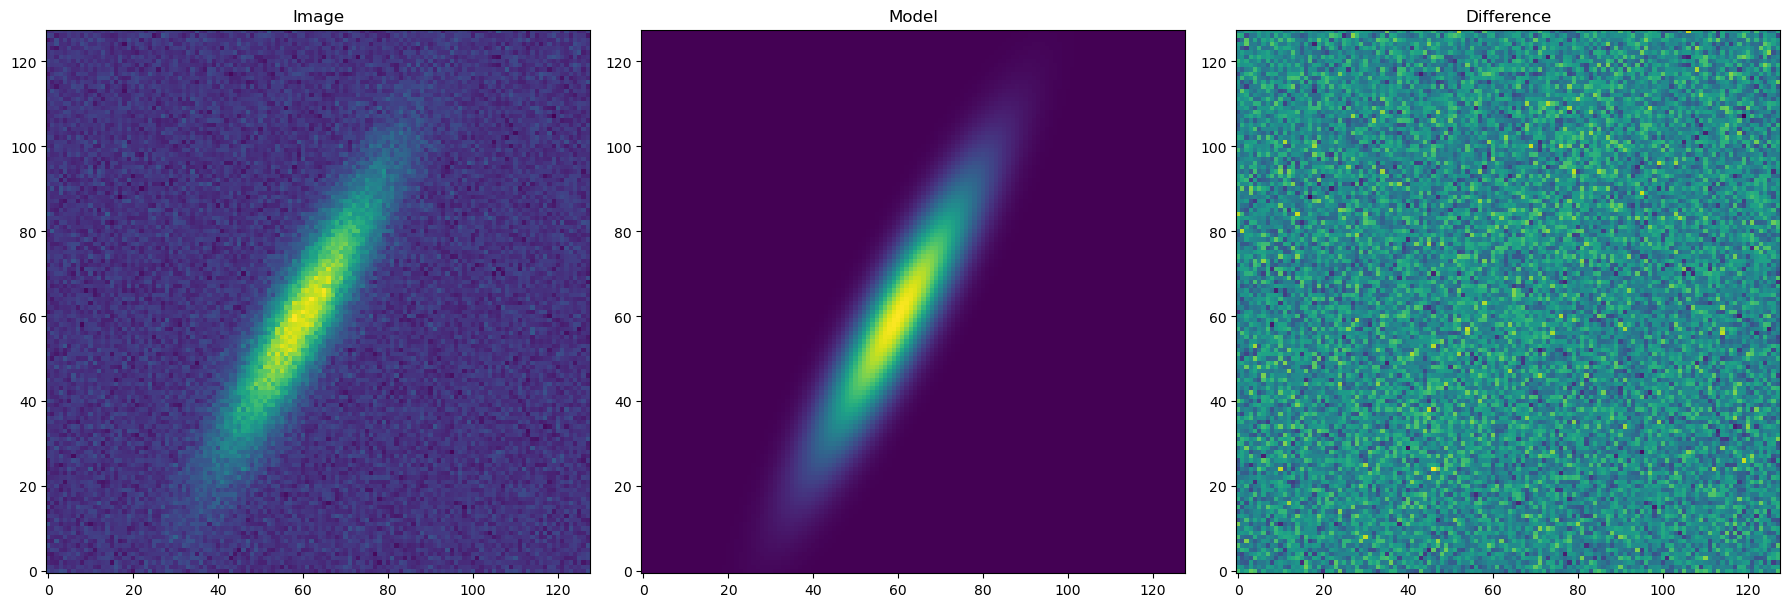

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,18))
ax1.set_title('Image')
ax1.imshow(image,origin='lower')
ax2.set_title('Model')
ax2.imshow(model(x,y),origin='lower')
ax3.set_title('Difference')
ax3.imshow(image-model(x,y),origin='lower')
plt.tight_layout()

Fitting spectral lines

In [ ]:
#from astropy.io import ascii
#sdss = ascii.read('.\sample_sdss.txt')
#sdss.colnames
##gives ['lambda','flux','err','tem]
#wave = sdss['lambda']
#flux = sdss['flux']
#plt.plot(wave,flux)
#Hbeta = 4862.721 ... Sb = 6732.68 #lines of various elements
#plt.text(4800,70,'Hbeta', rotation=90) etc..

#mean_flux = flux.mean()
#cont = np.where(flux>mean_flux,mean_flux,flux)
#linfitter = fitting.LinearLSQFitter()
#poly_cont = linfitter(models.Polynomial1D(1),wave,cont)

#plt.plot(wave,cont)
#plt.plot(wave,poly_cont(wave))